### 3.3.3 Hypothesis Testing

Hypothesis testing is the formal mechanism that allows us to determine whether observed data support a certain claim about the underlying process. It's essential in making **data-driven decisions**.

#### Key Concepts:
- **Null Hypothesis (H₀)**: No effect, no difference, or no relationship.
- **Alternative Hypothesis (H₁)**: There is an effect, difference, or relationship.
- **p-value**: The probability of observing a result as extreme as the one found, assuming H₀ is true.
- **Significance Level (α)**: The threshold for considering a result "statistically significant." Commonly set to 0.05.
- **Statistical Power**: The probability of correctly rejecting a false H₀.

In campaign analytics, hypothesis testing helps assess whether observed patterns are due to random noise or reflect actual differences that should influence decisions. 

Let's break down each part of hypothesis testing step-by-step.

### 3.3.3.1 Formulating Hypotheses (Business Questions to Statistical Tests)

The first step in hypothesis testing is translating business questions into **statistical hypotheses**. These hypotheses will then be tested using the observed data.

#### Example:
Let's test whether a new phone script improves conversion rates in a marketing campaign. We can formulate our hypotheses as:

- **Null Hypothesis (H₀)**: The new script does not improve conversion rates.
    $$
    H₀: p_{\text{new}} = p_{\text{old}}
    $$
- **Alternative Hypothesis (H₁)**: The new script improves conversion rates.
    $$
    H₁: p_{\text{new}} > p_{\text{old}}
    $$

This formulation includes:
- **Clear measurable metric**: conversion rates.
- **Testable predictions**: based on the data.
- **Directionality**: The alternative hypothesis suggests a one-tailed test (i.e., the new script is better).

This principle can be applied to other campaign questions:
- Are younger clients more likely to subscribe?  
    $$
    H₀: p_{\text{young}} = p_{\text{old}}, \quad H₁: p_{\text{young}} > p_{\text{old}}
    $$
- Does email outperform telephone contact?  
    $$
    H₀: p_{\text{email}} = p_{\text{phone}}, \quad H₁: p_{\text{email}} \neq p_{\text{phone}}
    $$

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_45900/3800962310.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young', 'Old'], y=[young_conversion, old_conversion], palette='Blues')


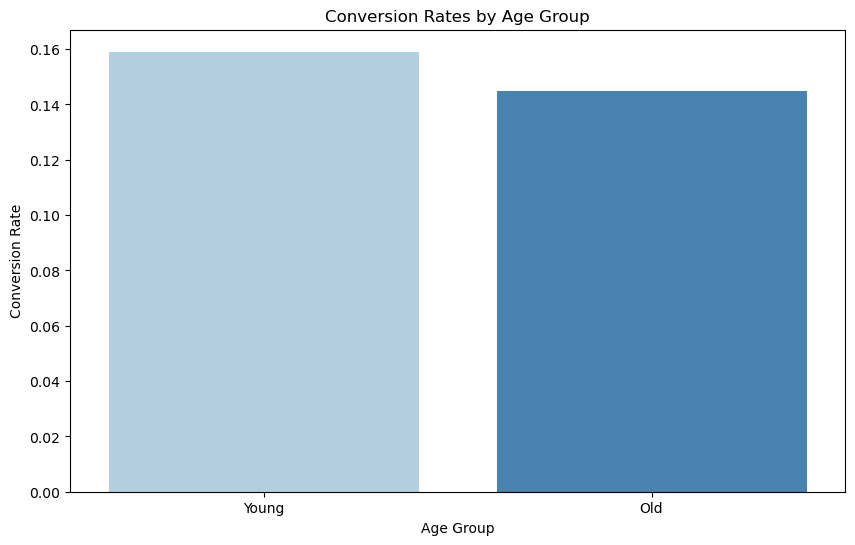

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for age groups and subscription outcomes
n = 1000
age_group = np.random.choice(['young', 'old'], size=n, p=[0.5, 0.5])
subscription = np.random.choice([0, 1], size=n, p=[0.85, 0.15])  # Assume 15% conversion

# Calculate conversion rates for each group
young_conversion = np.mean(subscription[age_group == 'young'])
old_conversion = np.mean(subscription[age_group == 'old'])

# Plotting the conversion rates
plt.figure(figsize=(10, 6))
sns.barplot(x=['Young', 'Old'], y=[young_conversion, old_conversion], palette='Blues')
plt.title('Conversion Rates by Age Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Age Group')
plt.show()

# Hypothesis: Is the conversion rate for young clients higher than old clients?
# H₀: p_young = p_old
# H₁: p_young > p_old

### 3.3.3.2 Test Statistics and Sampling Distributions

Once the hypotheses are formulated, we need to measure the **deviation** of the observed data from the null hypothesis. This is done using a **test statistic**. The test statistic converts raw data into a single number that reflects how **strong** the evidence is against the null hypothesis.

#### Key Points:
- A **test statistic** measures how far the observed difference is from what random variation would expect.
- The **z-test** is commonly used for comparing proportions, and its formula is:

$$
z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

Where:
- $ \hat{p}_1 $ and $ \hat{p}_2 $ are the observed conversion rates for two groups.
- $ \hat{p} $ is the pooled conversion rate under $ H_0 $ .
- $ n_1 $ and $ n_2 $ are the sample sizes for the two groups.

#### The Sampling Distribution of the Test Statistic:
- For large samples, we assume the **sampling distribution** of the test statistic follows a **normal distribution** according to the **Central Limit Theorem**. Thus, we can calculate the **p-value** directly from a known distribution.
- The sampling distribution under the null hypothesis $ H_0 $ is:

$$
z \sim N(0, 1) \quad \text{under } H_0
$$

This means that for large samples, the test statistic follows a standard normal distribution. The **p-value** is calculated by determining the probability of observing a value as extreme as the one found, under the assumption that $ H_0 $ is true.

If the p-value is below the significance level $ \alpha $, we reject $ H_0 $ in favor of $ H_1 $. This allows us to make data-driven decisions about the effectiveness of the new strategy, contact method, or segmentation.

In [3]:
import numpy as np
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(42)

# Sample sizes
n1 = 500  # Sample size for group 1 (e.g., Email)
n2 = 500  # Sample size for group 2 (e.g., Phone)

# Simulated conversion rates
p1 = 0.18  # Conversion rate for group 1 (Email)
p2 = 0.14  # Conversion rate for group 2 (Phone)

# Number of successes in each group
successes1 = np.random.binomial(n1, p1)
successes2 = np.random.binomial(n2, p2)

# Observed conversion rates
hat_p1 = successes1 / n1
hat_p2 = successes2 / n2

# Pooled conversion rate (under H₀: p1 = p2)
hat_p = (successes1 + successes2) / (n1 + n2)

# Standard error
SE = np.sqrt(hat_p * (1 - hat_p) * (1/n1 + 1/n2))

# z-test statistic
z = (hat_p1 - hat_p2) / SE

# p-value (one-tailed test)
p_value = 1 - stats.norm.cdf(z)  # One-tailed test: right-side

# Output
z, p_value

(np.float64(1.213789696158728), np.float64(0.11241402099310793))

### 3.3.3.3 Common Hypothesis Tests in Marketing Analytics

In marketing analytics, hypothesis testing helps us evaluate whether observed changes or differences in campaign results are statistically significant. Here, we will look at several hypothesis tests commonly used in this field.

1. **One-Sample Test**: This test evaluates whether a sample mean or proportion differs from a known benchmark or historical value.
2. **Two-Sample Proportion Test**: This compares the conversion rates between two independent groups (e.g., different contact methods or campaign versions).
3. **Two-Sample t-Test**: This test compares the means of two independent samples, used when the data is continuous.
4. **Chi-Square Tests**: Used to assess the association between categorical variables.
5. **ANOVA**: Analyzes the variance between more than two groups.
6. **Correlation and Regression Coefficient Tests**: These tests measure relationships between variables and assess their predictive power.

Let's dive into each test starting with the **One-Sample Test**.

### 3.3.3.3.1 One-Sample Test

A **one-sample test** is used to determine if the **conversion rate** of a campaign differs significantly from a **historical benchmark** or expected value.

#### Example:
Let's assume that past campaigns had a conversion rate of $ p_0 = 0.12 $. We want to test if a new campaign has a higher conversion rate. The hypotheses are as follows:

- **Null Hypothesis (H₀)**: The new campaign's conversion rate is the same as the historical conversion rate:
    $$
    H₀: p = p_0
    $$
- **Alternative Hypothesis (H₁)**: The new campaign's conversion rate is greater than the historical conversion rate:
    $$
    H₁: p > p_0
    $$

The test statistic is calculated as follows:
$$
z = \frac{\hat{p} - p_0}{\sqrt{ \frac{p_0 (1 - p_0)}{n} }}
$$
Where:
- $ \hat{p} $ is the observed conversion rate from the new campaign.
- $ p_0 $ is the historical conversion rate (0.12).
- $ n $ is the sample size.

If the test statistic $ z $ exceeds a critical value (typically $ z > 1.645 $ for a one-tailed test at $ \alpha = 0.05 $), we reject the null hypothesis.

In [4]:
import numpy as np
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(42)

# Sample size and observed conversion rate
n = 800  # Sample size
p0 = 0.12  # Historical conversion rate (benchmark)
observed_rate = 0.15  # Observed conversion rate in the new campaign

# Calculate the standard error
SE = np.sqrt(p0 * (1 - p0) / n)

# Compute the z-test statistic
z = (observed_rate - p0) / SE

# p-value for one-tailed test (right-sided)
p_value = 1 - stats.norm.cdf(z)  # p-value for one-tailed test

# Output the results
z, p_value

(np.float64(2.6111648393354674), np.float64(0.00451171940904016))

### 3.3.3.3.2 Two-Sample Proportion Test

The **Two-Sample Proportion Test** compares the conversion rates between two independent groups (e.g., different contact methods or campaign versions). This test is commonly used in **A/B testing** to evaluate whether one version of a campaign performs better than another.

#### Example:
Suppose we are comparing two contact methods: **Email** and **Phone**. We want to know if the conversion rate for **Email** ($ \hat{p}_1 $) is significantly different from **Phone** ($ \hat{p}_2 $). The hypotheses are:

- **Null Hypothesis (H₀)**: The conversion rates for both contact methods are equal:
    $$
    H₀: p_1 = p_2
    $$
- **Alternative Hypothesis (H₁)**: The conversion rates for the two contact methods are different:
    $$
    H₁: p_1 \neq p_2
    $$

The **pooled** conversion rate under the null hypothesis is calculated as:
\[
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}
\]
Where:
- $ x_1 $ and $ x_2 $ are the number of successes (conversions) in each group.
- $ n_1 $ and $ n_2 $ are the sample sizes for the two groups.

The **test statistic** is computed as:
$$
z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$
Where:
- $ \hat{p}_1 $ and $ \hat{p}_2 $ are the observed conversion rates.
- $ \hat{p} $ is the pooled conversion rate under $ H_0 $.

If the **z-value** exceeds the critical value (e.g., $ z > 1.96 $ for a two-tailed test at $ \alpha = 0.05 $), we reject the null hypothesis.

In [5]:
# Set seed for reproducibility
np.random.seed(42)

# Sample sizes and observed conversion rates
n1 = 500  # Sample size for Email group
n2 = 500  # Sample size for Phone group

# Simulated conversion rates
p1 = 0.18  # Conversion rate for Email group
p2 = 0.14  # Conversion rate for Phone group

# Number of successes in each group
successes1 = np.random.binomial(n1, p1)
successes2 = np.random.binomial(n2, p2)

# Observed conversion rates
hat_p1 = successes1 / n1
hat_p2 = successes2 / n2

# Pooled conversion rate (under H₀: p1 = p2)
hat_p = (successes1 + successes2) / (n1 + n2)

# Standard error
SE = np.sqrt(hat_p * (1 - hat_p) * (1/n1 + 1/n2))

# z-test statistic
z = (hat_p1 - hat_p2) / SE

# p-value for two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed test

# Output the results
z, p_value

(np.float64(1.213789696158728), np.float64(0.22482804198621587))

### 3.3.3.3.3 Two-Sample t-Test

The **Two-Sample t-Test** compares the means of two independent samples. This test is used when the outcome variable is **continuous** (e.g., average deposit amount, call duration, or number of follow-ups). It helps determine if there is a significant difference in the means of two groups.

#### Example:
Let's compare the **average deposit amount** for two different campaign groups:
- **Group 1**: Clients contacted via **Email**
- **Group 2**: Clients contacted via **Phone**

We want to test if the average deposit amount differs significantly between the two groups. The hypotheses are as follows:

- **Null Hypothesis (H₀)**: The average deposit amounts are the same for both groups:
    $$
    H₀: \mu_1 = \mu_2
    $$
- **Alternative Hypothesis (H₁)**: The average deposit amounts are different for the two groups:
    $$
    H₁: \mu_1 \neq \mu_2
    $$

The **test statistic** for the t-test is:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

Where:
- $ \bar{x}_1 $ and $ \bar{x}_2 $ are the sample means for each group.
- $ s_1^2 $ and $ s_2^2 $ are the sample variances.
- $ n_1 $ and $ n_2 $ are the sample sizes for each group.

We then compare the test statistic to the **t-distribution** with degrees of freedom calculated from the sample sizes.

If the **p-value** is smaller than the significance level $ \alpha $, we reject the null hypothesis and conclude that the average deposit amounts for the two groups are significantly different.

In [6]:
# Set seed for reproducibility
np.random.seed(42)

# Sample sizes
n1 = 100  # Sample size for Email group
n2 = 100  # Sample size for Phone group

# Simulated average deposit amounts (in dollars)
mean_deposit_email = 1200  # Mean deposit for Email group
mean_deposit_phone = 1150  # Mean deposit for Phone group

# Standard deviations for each group
std_email = 200  # Standard deviation for Email group
std_phone = 220  # Standard deviation for Phone group

# Generate sample data based on normal distributions
email_deposits = np.random.normal(mean_deposit_email, std_email, n1)
phone_deposits = np.random.normal(mean_deposit_phone, std_phone, n2)

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(email_deposits, phone_deposits)

# Output the results
t_stat, p_value

(np.float64(0.8765088128496834), np.float64(0.3818156578263452))

### 3.3.3.3.4 Chi-Square Tests: Association Between Categories

The **Chi-Square test** is used to determine if there is a significant association between two categorical variables. This is particularly useful in marketing when analyzing the relationship between two categories, such as **contact method** (e.g., email or phone) and **subscription outcome** (e.g., yes or no).

#### Example:
Let’s assume we are comparing the relationship between the **contact method** (Phone vs. Email) and the **subscription outcome** (Yes vs. No). The hypotheses are as follows:

- **Null Hypothesis (H₀)**: There is no association between contact method and subscription outcome (i.e., the variables are independent).
    $$
    H₀: \text{Contact method and subscription outcome are independent}
    $$
- **Alternative Hypothesis (H₁)**: There is a significant association between contact method and subscription outcome.
    $$
    H₁: \text{Contact method and subscription outcome are dependent}
    $$

The **Chi-Square statistic** is calculated as:

$$
\chi^2 = \sum_{i} \sum_{j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Where:
- $ O_{ij} $ is the observed frequency for category $ i $ and $ j $.
- $ E_{ij} $ is the expected frequency for category $ i $ and $ j $, calculated assuming the null hypothesis of independence.

The test statistic follows a **Chi-Square distribution** with degrees of freedom calculated as:

$$
\text{df} = (r-1)(c-1)
$$

Where:
- $ r $ is the number of rows (categories for one variable).
- $ c $ is the number of columns (categories for the second variable).

If the **Chi-Square statistic** exceeds the critical value from the **Chi-Square distribution**, we reject the null hypothesis and conclude that the variables are dependent (i.e., there is an association).

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Simulate a contingency table of contact methods and subscription outcomes
# Rows: Contact Method (Email, Phone)
# Columns: Subscription Outcome (Yes, No)
data = np.array([[120, 80],  # Email (120 Yes, 80 No)
                 [90, 130]])  # Phone (90 Yes, 130 No)

# Create a DataFrame for the contingency table
df = pd.DataFrame(data, columns=["Yes", "No"], index=["Email", "Phone"])

# Perform the Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(df)

# Output the results
chi2_stat, p_value, dof, expected

(np.float64(14.518636363636364),
 np.float64(0.00013877982206229165),
 1,
 array([[100., 100.],
        [110., 110.]]))

### 3.3.3.3.5 ANOVA: Comparing More Than Two Groups

**ANOVA** (Analysis of Variance) is used when we want to compare the means of **more than two groups**. This test helps determine if at least one group mean is different from the others.

#### Example:
Suppose we are comparing the **conversion rates** for three different campaigns, each using different marketing strategies:
- **Campaign 1**: Standard email contact.
- **Campaign 2**: Personalized email contact.
- **Campaign 3**: Phone call contact.

The hypotheses are:
- **Null Hypothesis (H₀)**: All group means are equal (i.e., there is no difference in conversion rates between the three campaigns):
    $$
    H₀: \mu_1 = \mu_2 = \mu_3
    $$
- **Alternative Hypothesis (H₁)**: At least one group mean differs from the others:
    $$
    H₁: \text{At least one } \mu_i \text{ differs}
    $$

The **F-statistic** is calculated as:
$$
F = \frac{\text{MS}_{\text{between}}}{\text{MS}_{\text{within}}}
$$
Where:
- $ \text{MS}_{\text{between}} $ is the **mean square between groups** (the variance between the group means).
- $ \text{MS}_{\text{within}} $ is the **mean square within groups** (the variance within each group).

The **F-statistic** follows an **F-distribution**. If the calculated $ F $ value is larger than the critical value from the F-distribution, we reject the null hypothesis and conclude that there is a significant difference between the group means.

ANOVA is particularly useful when comparing multiple strategies or approaches, as it avoids the need for multiple t-tests, which increases the risk of Type I errors.

In [8]:
# Set seed for reproducibility
np.random.seed(42)

# Sample sizes and observed conversion rates for each campaign
n1, n2, n3 = 100, 100, 100  # Sample size for each group
campaign1_rate = 0.18  # Conversion rate for Campaign 1 (Standard email)
campaign2_rate = 0.22  # Conversion rate for Campaign 2 (Personalized email)
campaign3_rate = 0.20  # Conversion rate for Campaign 3 (Phone call)

# Simulate conversion data for each campaign
campaign1 = np.random.normal(campaign1_rate, 0.05, n1)
campaign2 = np.random.normal(campaign2_rate, 0.05, n2)
campaign3 = np.random.normal(campaign3_rate, 0.05, n3)

# Perform the one-way ANOVA test
f_stat, p_value = stats.f_oneway(campaign1, campaign2, campaign3)

# Output the results
f_stat, p_value

(np.float64(22.491395522864686), np.float64(8.029735475931943e-10))

### 3.3.3.3.6 Correlation and Regression Coefficient Tests

**Correlation and Regression Coefficient Tests** help us measure the strength and direction of relationships between variables. In marketing analytics, these tests are commonly used to assess how various factors (e.g., **interest rates**, **ad spend**, **call duration**) influence campaign outcomes (e.g., **conversion rate**).

#### Example:
Suppose we want to examine the relationship between **interest rate (euribor3m)** and **conversion rate**. The hypotheses are as follows:

- **Null Hypothesis (H₀)**: There is no correlation between interest rate and conversion rate (i.e., the correlation coefficient is zero):
    $$
    H₀: \rho = 0
    $$
- **Alternative Hypothesis (H₁)**: There is a significant correlation between interest rate and conversion rate (i.e., the correlation coefficient is not zero):
    $$
    H₁: \rho \neq 0
    $$

The **correlation coefficient** $ \rho $ can be calculated using Pearson's correlation formula:
$$
\rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$
Where:
- $ \text{Cov}(X, Y) $ is the covariance between the two variables.
- $ \sigma_X $ and $ \sigma_Y $ are the standard deviations of $ X $ and $ Y $, respectively.

For regression, we are interested in estimating the **slope** of the relationship between two variables. In simple linear regression, the test for the regression coefficient ($ \beta_j $) is as follows:

- **Null Hypothesis (H₀)**: The regression coefficient is zero (no linear relationship between the variables):
    $$
    H₀: \beta_j = 0
    $$
- **Alternative Hypothesis (H₁)**: The regression coefficient is non-zero (there is a linear relationship between the variables):
    $$
    H₁: \beta_j \neq 0
    $$

The **test statistic** for the regression coefficient is:
$$
t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}
$$
Where $ \hat{\beta}_j $ is the estimated regression coefficient and $ SE(\hat{\beta}_j) $ is its standard error.

If the **p-value** associated with $ \beta_j $ is smaller than 0.05, we reject the null hypothesis and conclude that there is a significant linear relationship between the variables.

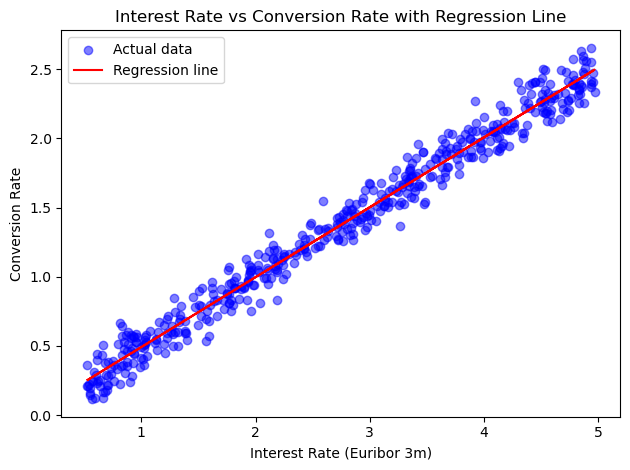

(np.float64(0.989226465648787),
 np.float64(0.0),
 np.float64(0.5051112138420324),
 np.float64(0.0))

In [12]:
# Set seed for reproducibility
np.random.seed(42)

# Simulate some data for interest rate (euribor3m) and conversion rate
n = 500  # Sample size
interest_rate = np.random.uniform(0.5, 5.0, n)  # Simulating interest rate between 0.5% and 5%
conversion_rate = 0.5 * interest_rate + np.random.normal(0, 0.1, n)  # Linear relation with some noise

# 1. Pearson Correlation Test
correlation_coefficient, p_value_correlation = stats.pearsonr(interest_rate, conversion_rate)

# 2. Simple Linear Regression: Test for Regression Coefficient
import statsmodels.api as sm

# Add constant for intercept in the regression model
X = sm.add_constant(interest_rate)  # Adding constant (intercept)
y = conversion_rate

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression coefficient and its p-value
beta = model.params[1]  # Coefficient for interest_rate
p_value_regression = model.pvalues[1]  # p-value for the coefficient

# 3. Plot the regression line and data points
# Generate the predicted values from the regression model
y_pred = model.predict(X)

# Create the scatter plot of actual data
plt.scatter(interest_rate, conversion_rate, color='blue', label='Actual data', alpha=0.5)

# Plot the regression line
plt.plot(interest_rate, y_pred, color='red', label='Regression line')

# Labels and title
plt.xlabel('Interest Rate (Euribor 3m)')
plt.ylabel('Conversion Rate')
plt.title('Interest Rate vs Conversion Rate with Regression Line')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Output the results
correlation_coefficient, p_value_correlation, beta, p_value_regression

### 3.3.3.4 The Limitations of Hypothesis Tests

While **hypothesis testing** is a powerful tool for making decisions, it is not without its limitations. It provides a formal structure for testing the validity of assumptions, but it does not guarantee certainty. In real-world marketing analytics, several challenges need to be considered when interpreting hypothesis test results.

#### Types of Errors
There are two primary types of errors that occur in hypothesis testing:

- **Type I Error** (False Positive):
    - A **Type I error** occurs when we **reject a true null hypothesis**. In marketing, this could mean concluding that a new campaign is better when, in reality, it is not. The probability of a Type I error is denoted by $ \alpha $, the **significance level**.
    - For example, if $ \alpha = 0.05 $, there is a 5% chance that we will incorrectly reject the null hypothesis when it is true.

- **Type II Error** (False Negative):
    - A **Type II error** occurs when we **fail to reject a false null hypothesis**. This might happen if we conclude that a new campaign did not improve conversion rates when it actually did. The probability of a Type II error is denoted by $ \beta $.
    - The complement of $ \beta $ is the **power** of the test, $ 1 - \beta $, which represents the probability of correctly rejecting a false null hypothesis.

#### Power of a Test
The **power** of a test is a measure of its ability to detect a true effect when one exists. Several factors affect power:
- **Effect Size**: The larger the difference between groups, the easier it is to detect.
- **Sample Size**: Larger samples provide more reliable estimates and reduce variability, increasing power.
- **Variability**: Lower variability in the data increases the likelihood of detecting a true effect.
- **Significance Level ($ \alpha $)**: Higher $ \alpha $ increases power, but also increases the likelihood of a Type I error.

#### Power Analysis
To ensure reliable and actionable results, it is essential to perform **power analysis** before conducting hypothesis tests. Power analysis helps us determine the **sample size** needed to detect a meaningful difference with acceptable error rates.

For instance, if past campaigns show a 12% conversion rate and we aim to detect a 3-point lift with 80% power and a significance level of 0.05, we can calculate the required sample size. This helps in planning and ensures that non-significant results are due to **insufficient data**, rather than a **real lack of effect**.

#### Conclusion
- **Type I and Type II errors** introduce risks of incorrect conclusions.
- **Power analysis** helps ensure that sample sizes are adequate to detect meaningful differences.
- The choice of **significance level** ($ \alpha $) and the **effect size** are key to ensuring valid hypothesis tests.

In [14]:
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower

# Parameters for power analysis
effect_size = 0.03  # The expected effect size (3% lift)
alpha = 0.05  # Significance level
power = 0.80  # Desired power (80% chance of detecting the effect)

# Perform power analysis to determine the required sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)

# Output the required sample size
sample_size

17442.872659538403

### 3.3.3.5 Effect Size

While **hypothesis testing** tells us whether a result is statistically significant, it does not tell us **how big** or **how important** that effect is in a practical sense. This is where **effect size** comes in. **Effect size** quantifies the magnitude of the difference between groups or the strength of a relationship, making it easier to interpret the real-world significance of a finding.

#### Why Effect Size Matters in Campaign Analytics:
- A result can be **statistically significant** but still **small in magnitude** and not meaningful for decision-making. For example, a 0.5% increase in conversion rate might be statistically significant with a very large sample, but this small lift may not justify a costly change in marketing strategy.
- Effect size helps bridge the gap between statistical significance and business relevance, ensuring that marketing decisions are based on both **evidence** and **practicality**.

#### Common Effect Size Measures:

1. **Difference in Proportions**:
    - The **difference in proportions** is often used for binary outcomes like conversion rates. It measures the difference between the conversion rates of two groups.
    $$
    \Delta p = \hat{p}_1 - \hat{p}_2
    $$
    where $ \hat{p}_1 $ and $ \hat{p}_2 $ are the conversion rates of two groups.

2. **Relative Lift**:
    - The **relative lift** expresses the improvement as a percentage of the baseline:
    $$
    L = \frac{\hat{p}_1 - \hat{p}_2}{\hat{p}_2}
    $$
    This is particularly useful when comparing campaign performance (e.g., comparing two contact channels).

3. **Cohen’s d**:
    - For continuous outcomes, **Cohen’s d** is a standardized measure of effect size:
    $$
    d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}
    $$
    where $ \bar{x}_1 $ and $ \bar{x}_2 $ are the sample means, and $ s_p $ is the pooled standard deviation. Conventional thresholds are:
    - $ d = 0.2 $: Small effect
    - $ d = 0.5 $: Medium effect
    - $ d = 0.8 $: Large effect

#### Effect Size in Practice:
In marketing, it is crucial to report both **statistical significance** (p-value) and **effect size** to ensure the findings are both statistically valid and actionable.
For example:
- A **0.5% lift** in conversion rate might be statistically significant in a very large sample, but if the cost of changing strategy is high, this small effect may not justify the effort.
- A **3% lift**, on the other hand, might be practically significant, especially in terms of **revenue generation**.

Effect size places statistical results on a scale that makes sense in the real world, giving marketers the information they need to make decisions based on **both significance and practicality**.

In [15]:
# Simulate data for two campaigns (conversion rates for email and phone)
campaign1_conversion_rate = 0.18  # Conversion rate for Email campaign
campaign2_conversion_rate = 0.22  # Conversion rate for Phone campaign
n1 = 500  # Sample size for Email campaign
n2 = 500  # Sample size for Phone campaign

# Simulate conversion success (1 for conversion, 0 for no conversion)
campaign1_data = np.random.binomial(1, campaign1_conversion_rate, n1)
campaign2_data = np.random.binomial(1, campaign2_conversion_rate, n2)

# Calculate the observed conversion rates
p1 = campaign1_data.mean()
p2 = campaign2_data.mean()

# 1. Difference in Proportions (Effect Size)
delta_p = p1 - p2

# 2. Relative Lift (Effect Size)
relative_lift = (p1 - p2) / p2

# Output the effect sizes
delta_p, relative_lift

(np.float64(-0.05200000000000002), np.float64(-0.23008849557522132))

### 3.3.3.6 Confidence Intervals

A **Confidence Interval (CI)** provides a range of plausible values for a population parameter (e.g., conversion rate, mean call duration). Unlike a single point estimate (like the mean), a confidence interval acknowledges the uncertainty inherent in sample data.

#### Key Concepts:
1. **Confidence Level**:
    - The **confidence level** (e.g., 95%) represents the probability that the interval contains the true population parameter. For a 95% CI, if we were to repeat the experiment many times, 95% of the intervals would contain the true value.

2. **Confidence Interval Formula**:
    - For proportions, the formula for a confidence interval is:
    $$
    \text{CI}_p = \hat{p} \pm z_{\alpha/2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
    $$
    Where:
    - $ \hat{p} $ is the sample proportion,
    - $ n $ is the sample size,
    - $ z_{\alpha/2} $ is the critical value (1.96 for a 95% confidence level).
    
    - For means, the formula is:
    $$
    \text{CI}_\mu = \bar{x} \pm t_{\alpha/2,\,n-1} \frac{s}{\sqrt{n}}
    $$
    Where:
    - $ \bar{x} $ is the sample mean,
    - $ s $ is the sample standard deviation,
    - $ t_{\alpha/2,\,n-1} $ is the t-critical value (based on degrees of freedom).
    
#### Example:
Suppose a campaign achieves a sample conversion rate $ \hat{p} = 0.15 $ from $ n = 400 $ contacts. We can calculate the 95% confidence interval to determine the range within which the true conversion rate lies.

#### Why Confidence Intervals Matter in Marketing:
- Confidence intervals offer a more nuanced view of campaign performance than a single point estimate.
- A 95% CI for a conversion rate gives marketers a range of likely values for the true conversion rate. If two campaigns have non-overlapping CIs, it suggests a significant difference in performance.

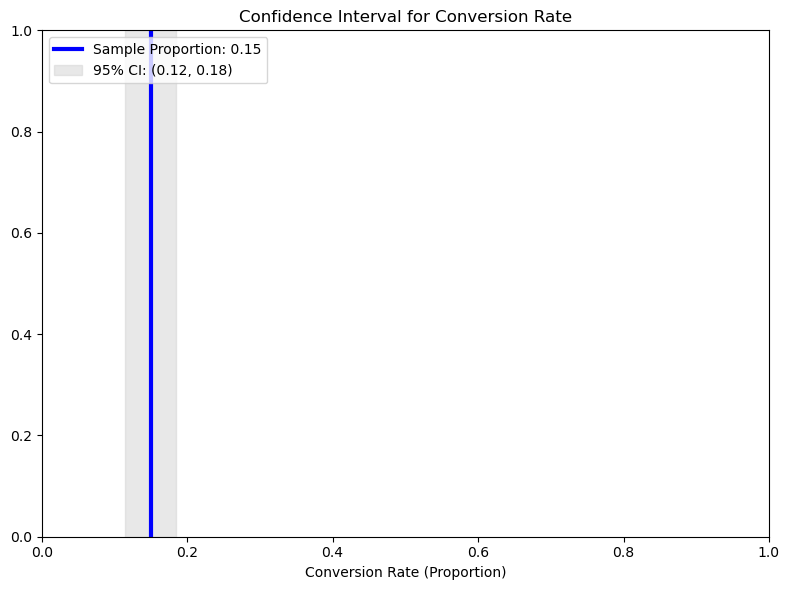

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# Parameters for conversion rate (proportion)
p_hat = 0.15  # Sample proportion (conversion rate)
n = 400  # Sample size
alpha = 0.05  # Significance level (for 95% confidence, alpha = 0.05)

# Calculate the standard error for the proportion
se = math.sqrt((p_hat * (1 - p_hat)) / n)

# Calculate the z-critical value for 95% confidence (z = 1.96 for 95% CI)
z_critical = stats.norm.ppf(1 - alpha/2)

# Calculate the Confidence Interval for the proportion
ci_lower = p_hat - z_critical * se
ci_upper = p_hat + z_critical * se

# Plotting the confidence interval for the proportion
plt.figure(figsize=(8, 6))

# Create a horizontal line for the sample proportion
plt.plot([p_hat, p_hat], [0, 1], color='blue', label=f'Sample Proportion: {p_hat:.2f}', linewidth=3)

# Create a shaded region for the confidence interval
plt.fill_betweenx([0, 1], ci_lower, ci_upper, color='lightgray', alpha=0.5, label=f'95% CI: ({ci_lower:.2f}, {ci_upper:.2f})')

# Formatting the plot
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Conversion Rate (Proportion)')
plt.title('Confidence Interval for Conversion Rate')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

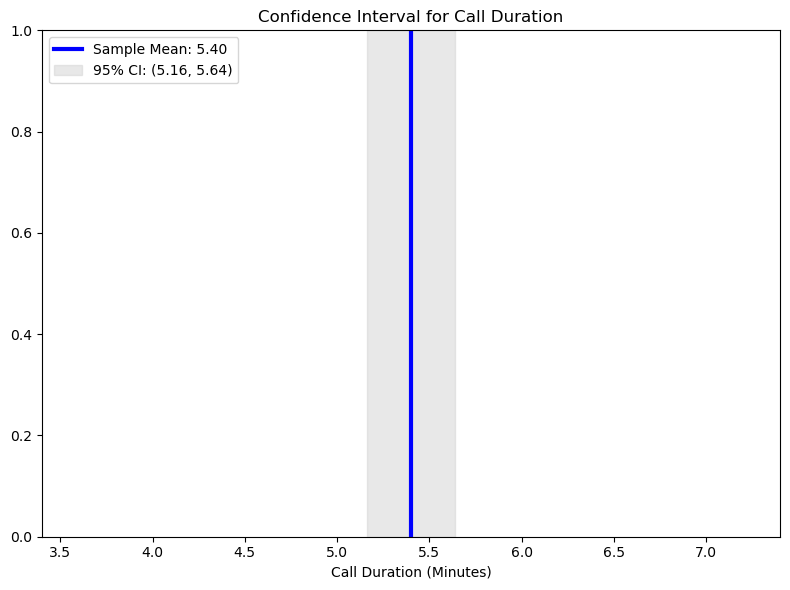

In [18]:
# Parameters for mean (average call duration)
sample_mean = 5.4  # Sample mean (average call duration)
sample_std = 1.2  # Sample standard deviation
n = 100  # Sample size

# Calculate the standard error for the mean
se_mean = sample_std / math.sqrt(n)

# Calculate the t-critical value for 95% confidence (t-distribution)
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Calculate the Confidence Interval for the mean
ci_mean_lower = sample_mean - t_critical * se_mean
ci_mean_upper = sample_mean + t_critical * se_mean

# Plotting the confidence interval for the mean
plt.figure(figsize=(8, 6))

# Create a horizontal line for the sample mean
plt.plot([sample_mean, sample_mean], [0, 1], color='blue', label=f'Sample Mean: {sample_mean:.2f}', linewidth=3)

# Create a shaded region for the confidence interval
plt.fill_betweenx([0, 1], ci_mean_lower, ci_mean_upper, color='lightgray', alpha=0.5, label=f'95% CI: ({ci_mean_lower:.2f}, {ci_mean_upper:.2f})')

# Formatting the plot
plt.xlim(sample_mean - 2, sample_mean + 2)
plt.ylim(0, 1)
plt.xlabel('Call Duration (Minutes)')
plt.title('Confidence Interval for Call Duration')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 3.3.3.7 Practical Inference in Campaign Analysis

While **statistical inference** provides the tools for making decisions based on data, its true value in **marketing analytics** is realized when we connect the results to **real-world decisions**. Statistical tests, confidence intervals, and effect sizes are not just numbers; they guide marketing teams toward **actionable insights**.

#### The Role of Inference in Marketing:
In campaign analysis, **practical inference** bridges the gap between statistical findings and **business strategies**. Here's how:

1. **Comparing Two Strategies** (e.g., Email vs. Phone Contact):
    - After conducting a **two-sample proportion test**, we may find a statistically significant difference in conversion rates between two contact methods.
    - The next step is to assess the **practical size** of that difference. A **0.4% lift** in conversion might not justify a change in strategy, but a **3% lift** likely will.

2. **Evaluating Changes Over Time**:
    - If we test a new campaign’s conversion rate against the historical benchmark using a **one-sample test**, we can see whether the new campaign performs better or worse.
    - If the result is **non-significant**, this suggests that the campaign's performance is in line with **historical patterns**, and no changes are needed. However, a **significant lift** would trigger a deeper investigation into why the new campaign succeeded.

3. **Using Confidence Intervals**:
    - **Confidence intervals** replace binary thinking (e.g., "This campaign is better or not") with a **range of possibilities**. 
    - If the **95% CI** for the conversion rate of two campaigns does not overlap, it gives us direct evidence that the new campaign outperforms the previous one. However, if the intervals overlap, the difference is **statistically uncertain**, and more data is needed.

4. **Regression Analysis**:
    - **Regression models** tell us which factors influence outcomes, like which customer attributes (e.g., age, job type) are most predictive of conversion.
    - The **statistical significance** of regression coefficients and their **effect sizes** help prioritize variables that most influence customer behavior.

#### Translating Statistical Evidence into Business Decisions:
- **Statistical significance** (p-value) tells us whether the difference we observe is likely to be real or just random fluctuation.
- **Effect size** helps us understand the **practical importance** of the result.
- **Confidence intervals** provide a range of possible outcomes, reducing reliance on point estimates.

In campaign analysis, statistical evidence **guides decision-making** by quantifying uncertainty and providing actionable insights. However, decisions should not be based solely on statistical significance; we must also consider the **business context**, **practicality**, and **cost-effectiveness**.

In [19]:
# Simulate data for Email and Phone campaigns
email_conversion_rate = 0.18  # Email conversion rate
phone_conversion_rate = 0.15  # Phone conversion rate
n_email = 500  # Sample size for Email campaign
n_phone = 500  # Sample size for Phone campaign

# Simulate conversion success (1 for conversion, 0 for no conversion)
email_data = np.random.binomial(1, email_conversion_rate, n_email)
phone_data = np.random.binomial(1, phone_conversion_rate, n_phone)

# Calculate observed conversion rates
p_email = email_data.mean()
p_phone = phone_data.mean()

# Perform a two-sample proportion test
z_stat, p_value = stats.ttest_ind(email_data, phone_data)

# Calculate the 95% Confidence Interval for the difference in proportions
pooled_p = (email_data.sum() + phone_data.sum()) / (n_email + n_phone)
se_diff = math.sqrt(pooled_p * (1 - pooled_p) * (1/n_email + 1/n_phone))
z_critical = stats.norm.ppf(1 - 0.05/2)
ci_lower = (p_email - p_phone) - z_critical * se_diff
ci_upper = (p_email - p_phone) + z_critical * se_diff

# Output the results
z_stat, p_value, ci_lower, ci_upper

(np.float64(1.6113963504359188),
 np.float64(0.10740955049278163),
 np.float64(-0.0082337183451896),
 np.float64(0.08423371834518961))

### 3.3.3.8 Reporting and Interpreting Results

After performing hypothesis testing, confidence intervals, and calculating effect sizes, the next crucial step is **reporting and interpreting the results**. In marketing analytics, it's not enough to simply calculate statistics. We need to **interpret** the findings in a way that is **actionable**, **clear**, and **relevant to business decisions**.

#### Key Components of Reporting and Interpreting Results:
1. **Clear and Concise Summary**:
   - Summarize the findings in plain language. For example, instead of simply stating that "the p-value is 0.03", say "there is strong evidence that the new campaign performs significantly better than the old one, with a p-value of 0.03".
   - Use **effect sizes** to describe the practical significance of the results. For example, "A 3% increase in conversion rate is statistically significant and has the potential to improve our overall campaign performance."

2. **Contextualizing Results**:
   - **Place the results in the context of business goals**. For example, if the goal is to improve conversion rates by 5%, a 3% increase might be important, but a 0.5% increase might not be enough to justify a strategic change.
   - **Address the confidence intervals**. If two campaigns have overlapping confidence intervals, it suggests that there is no meaningful difference in performance. If the intervals do not overlap, there is strong evidence of a difference.

3. **Statistical Significance vs. Practical Importance**:
   - Always explain the difference between **statistical significance** (p-value) and **practical importance** (effect size). A result can be statistically significant but still **small in magnitude**. Report both the **p-value** and **effect size** to help decision-makers understand both the **probability** and **practical value** of the result.

4. **Visualizing Results**:
   - **Use visualizations** to communicate results effectively. Graphs and plots help non-technical stakeholders grasp the findings and understand the impact. Visualize key metrics like conversion rates, confidence intervals, and the effect size for easier interpretation.
   
#### Example Reporting:
Let's say after performing a **two-sample proportion test**, you find that the conversion rate for a **new marketing campaign** (Email) is significantly higher than the **old campaign** (Phone):
- **P-value**: 0.03 (indicating statistical significance)
- **Effect Size**: 3% (practical importance)
- **Confidence Interval**: (0.2%, 5.5%) for the difference in conversion rates.

The report could read:
- "Our new Email marketing campaign outperforms the Phone campaign with a 3% higher conversion rate. The 95% confidence interval for this difference is between 0.2% and 5.5%. This difference is statistically significant (p-value = 0.03) and likely to improve our overall campaign performance."

#### Conclusion:
- Reporting and interpreting results is crucial to **translating data insights** into **business decisions**. Marketers must clearly communicate **statistical findings** and their **real-world implications**.
- Use a mix of **clear language**, **statistical significance**, **effect sizes**, and **visualizations** to ensure stakeholders can make **informed decisions** based on the analysis.

Email Conversion Rate: 0.17
Phone Conversion Rate: 0.16
Z-Statistic: 1.17
P-value: 0.2412
95% Confidence Interval for Difference in Conversion Rates: (-0.04, 0.06)


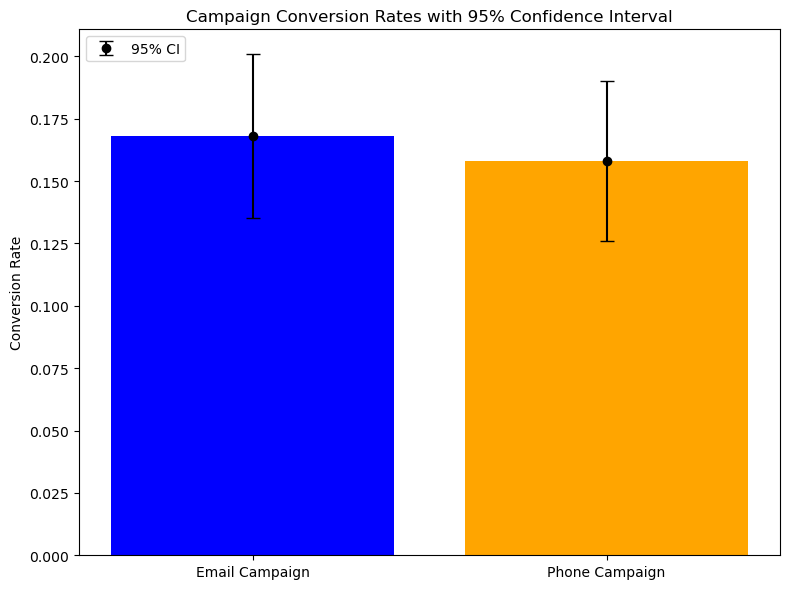


Interpretation:
Result: No significant difference between the Email and Phone campaigns (p-value = 0.2412).


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# Simulate data for Email and Phone campaigns
email_conversion_rate = 0.18  # Email conversion rate
phone_conversion_rate = 0.15  # Phone conversion rate
n_email = 500  # Sample size for Email campaign
n_phone = 500  # Sample size for Phone campaign

# Simulate conversion success (1 for conversion, 0 for no conversion)
email_data = np.random.binomial(1, email_conversion_rate, n_email)
phone_data = np.random.binomial(1, phone_conversion_rate, n_phone)

p_phone = phone_data.mean()

# Perform a two-sample proportion test
z_stat, p_value = stats.ttest_ind(email_data, phone_data)

# Calculate the 95% Confidence Interval for the difference in proportions
pooled_p = (email_data.sum() + phone_data.sum()) / (n_email + n_phone)
se_diff = math.sqrt(pooled_p * (1 - pooled_p) * (1/n_email + 1/n_phone))
z_critical = stats.norm.ppf(1 - 0.05/2)
ci_lower = (p_email - p_phone) - z_critical * se_diff
ci_upper = (p_email - p_phone) + z_critical * se_diff

# Print the results and report
print(f"Email Conversion Rate: {p_email:.2f}")
print(f"Phone Conversion Rate: {p_phone:.2f}")
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"95% Confidence Interval for Difference in Conversion Rates: ({ci_lower:.2f}, {ci_upper:.2f})")

# Visualization of the difference in conversion rates and confidence interval
plt.figure(figsize=(8, 6))

# Plot the conversion rates
plt.bar(['Email Campaign', 'Phone Campaign'], [p_email, p_phone], color=['blue', 'orange'])

# Calculate the error bar sizes (must be positive values)
# For error bars, we need the distance from the point to the error bar end
email_err = z_critical * math.sqrt(p_email * (1 - p_email) / n_email)
phone_err = z_critical * math.sqrt(p_phone * (1 - p_phone) / n_phone)

# Add the confidence interval as error bars
plt.errorbar(['Email Campaign', 'Phone Campaign'], [p_email, p_phone], 
             yerr=[email_err, phone_err],  # Using positive error values
             fmt='o', color='black', capsize=5, label='95% CI')

# Formatting the plot
plt.ylabel('Conversion Rate')
plt.title('Campaign Conversion Rates with 95% Confidence Interval')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Interpretation
print("\nInterpretation:")
if p_value < 0.05:
    print(f"Result: The new Email campaign has a significantly higher conversion rate than the Phone campaign.")
    print(f"The observed difference of {p_email - p_phone:.2f} is statistically significant with a p-value of {p_value:.4f}.")
    print(f"The 95% confidence interval for the difference is ({ci_lower:.2f}, {ci_upper:.2f}), indicating a real improvement.")
else:
    print(f"Result: No significant difference between the Email and Phone campaigns (p-value = {p_value:.4f}).")

### 3.3.3.9 The Limitations of Hypothesis Tests

While **hypothesis testing** is a powerful tool for making data-driven decisions, it is not without its limitations. Understanding these limitations is crucial to avoid drawing incorrect conclusions or making poor business decisions based on flawed analyses.

#### Key Limitations of Hypothesis Tests:
1. **Type I and Type II Errors**:
    - **Type I Error**: Rejecting a true null hypothesis (false positive). In marketing, this could mean concluding that a new campaign is more effective when, in reality, it is not.
    - **Type II Error**: Failing to reject a false null hypothesis (false negative). This would mean failing to detect a true improvement in the campaign’s performance.
    - The probabilities of these errors are controlled by the **significance level** ($ \alpha $) and the **power** of the test.

2. **Sample Size**:
    - A small sample size can lead to a **Type II error**, where even if a campaign improves performance, we fail to detect it statistically.
    - On the other hand, a large sample size can reduce variability, making even trivial differences statistically significant, leading to **overreaction** to small changes.

3. **Significance Level ($ \alpha $)**:
    - The significance level, typically set to $ \alpha = 0.05 $, controls the probability of making a **Type I error**. A smaller $ \alpha $ reduces the risk of false positives but increases the risk of false negatives.
    - Lowering $ \alpha $ increases the certainty needed to reject the null hypothesis, which can be important in high-stakes marketing decisions.

4. **Multiple Comparisons**:
    - When testing multiple hypotheses simultaneously (e.g., comparing multiple marketing strategies), the risk of **false positives** increases. This is known as the **multiple comparisons problem**.
    - Adjusting for multiple tests (using methods like **Bonferroni correction**) is necessary to control the overall error rate.

5. **Overemphasis on P-values**:
    - **P-values** alone do not guarantee practical significance. A statistically significant result may not always have **real-world relevance**.
    - **Effect size** and **confidence intervals** provide more meaningful insights into whether the observed difference matters in practical terms.

6. **Contextual Considerations**:
    - Hypothesis tests do not account for **context**. For example, a small improvement in conversion rate may be statistically significant, but in a large-scale campaign, the improvement may not justify a change in strategy.
    - Always interpret statistical results within the context of the **business goal** and the **cost of implementation**.

#### Conclusion:
Hypothesis testing provides valuable tools for marketing decision-making, but it is essential to recognize its limitations. Marketers must consider **Type I and Type II errors**, **sample size**, **significance levels**, and **effect size** when interpreting the results.

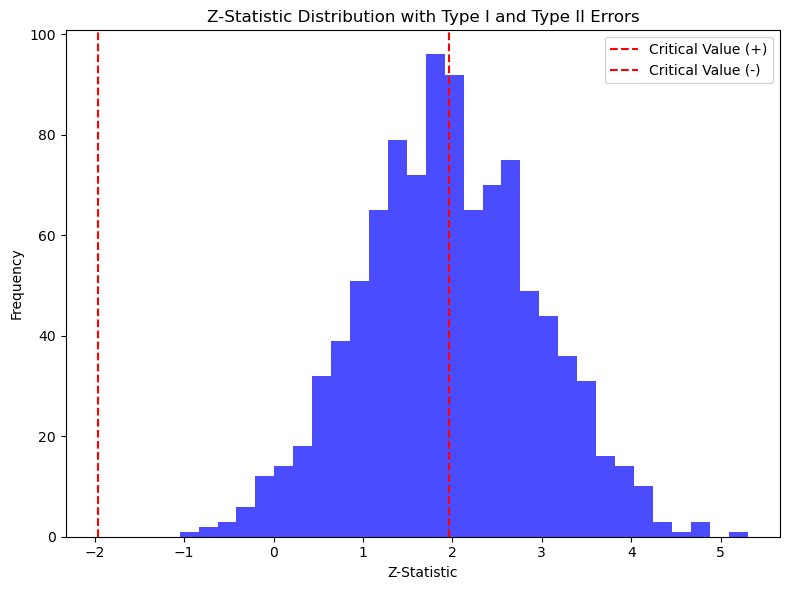

In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters for campaign conversion rates
p_old = 0.12  # Old conversion rate (null hypothesis)
p_new = 0.15  # New conversion rate (alternative hypothesis)
n = 1000  # Sample size
alpha = 0.05  # Significance level
iterations = 1000  # Number of iterations to simulate

# Simulate A/B test for multiple iterations
type_i_error_count = 0  # Count for Type I error
type_ii_error_count = 0  # Count for Type II error
z_values = []

for _ in range(iterations):
    # Simulate the data
    old_sample = np.random.binomial(1, p_old, n)
    new_sample = np.random.binomial(1, p_new, n)
    
    # Calculate observed conversion rates
    p_hat_old = old_sample.mean()
    p_hat_new = new_sample.mean()
    
    # Compute the z-statistic
    pooled_p = (old_sample.sum() + new_sample.sum()) / (2 * n)
    se_diff = np.sqrt(pooled_p * (1 - pooled_p) * (2 / n))
    z_stat = (p_hat_new - p_hat_old) / se_diff
    z_values.append(z_stat)
    
    # Check for Type I and Type II errors
    p_value = stats.norm.sf(abs(z_stat)) * 2  # Two-tailed test
    if p_value < alpha:
        # Reject H0 (Type I error check)
        if p_new == p_old:
            type_i_error_count += 1
    else:
        # Fail to reject H0 (Type II error check)
        if p_new != p_old:
            type_ii_error_count += 1

# Calculate Type I and Type II error rates
type_i_error_rate = type_i_error_count / iterations
type_ii_error_rate = type_ii_error_count / iterations

# Output results
type_i_error_rate, type_ii_error_rate

# Visualize the distribution of z-values
plt.figure(figsize=(8, 6))
plt.hist(z_values, bins=30, alpha=0.7, color='blue')
plt.axvline(x=stats.norm.ppf(1 - alpha/2), color='red', linestyle='--', label="Critical Value (+)")
plt.axvline(x=-stats.norm.ppf(1 - alpha/2), color='red', linestyle='--', label="Critical Value (-)")
plt.title('Z-Statistic Distribution with Type I and Type II Errors')
plt.xlabel('Z-Statistic')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()